# Ejercicio 4 – Sistema de recomendación simple de películas.
### Fase 1: CARGA Y EXPLORACIÓN GENERAL  
por Jessica | Rama: Steph

**Ejercicio 1.0 – Carga y exploración inicial**

En este primer ejercicio haremos la carga de los datasets `ratings.csv` y `movies.csv` que pertenecen al conjunto de datos MovieLens 100k. El objetivo es verificar su estructura, asegurarse de que no existan valores nulos, y preparar la base para futuros análisis.

El archivo `ratings.csv` tiene información sobre las calificaciones que los usuarios dieron a distintas películas, mientras que `movies.csv` tiene los títulos y géneros asociados a cada `movieId`.

Se exploran las dimensiones, tipos de datos y existencia de valores nulos. Esta revisión es esencial para garantizar integridad antes de combinar ambos datasets en un único dataframe para análisis posterior.


In [15]:
import pandas as pd

# Cargar datasets
ratings = pd.read_csv("../datasets/ratings.csv")
movies = pd.read_csv("../datasets/movies.csv")

# Dimensiones
print("ratings.csv")
print("Filas:", ratings.shape[0], "| Columnas:", ratings.shape[1])
print("\nmovies.csv")
print("Filas:", movies.shape[0], "| Columnas:", movies.shape[1])

# Primeras filas
print("\nPrimeras filas de ratings.csv:")
display(ratings.head())

print("\nPrimeras filas de movies.csv:")
display(movies.head())

# Tipos de datos y nulos
print("\nInformación general de ratings:")
ratings.info()

print("\nInformación general de movies:")
movies.info()

# Revisión de valores nulos
print("\nValores nulos en ratings:")
print(ratings.isnull().sum())

print("\nValores nulos en movies:")
print(movies.isnull().sum())


ratings.csv
Filas: 100836 | Columnas: 4

movies.csv
Filas: 9742 | Columnas: 3

Primeras filas de ratings.csv:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931



Primeras filas de movies.csv:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy



Información general de ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Información general de movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

Valores nulos en ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Valores nulos en movies:
movieId    0
title      0
genres     0
dtype: int64


**Ejercicio 1.1 – Unión de datos y revisión general**

Aqui integramos  los datasets `ratings.csv` y `movies.csv` mediante una unión tipo inner join sobre la columna `movieId`, que en este caso es la clave primaria compartida por ambos conjuntos. 

El resultado es un nuevo dataframe que contiene, para cada calificación, la información correspondiente del título y los géneros asociados a la película. Esto me ayudarpa a realizar un análisis más ricos en secciones posteriores, como preferencias por género, puntuaciones por usuario y modelos de recomendación.

Despues, se verifica que la operación haya sido exitosa y se revisa el contenido del nuevo dataframe combinado (`df`), incluyendo sus dimensiones, tipos de datos y presencia de valores nulos.

In [16]:
# union de datos
df = pd.merge(ratings, movies, on="movieId", how="inner")


#dimensones del nuevo dataframe
print("Dimensiones del dataframe combinado:")
print("Filas:", df.shape[0], "| Columnas:", df.shape[1])

#1eras filas
print("\nPrimeras filas del dataframe combinado:")
display(df.head())

# tipos de datos
print("\nTipos de datos por columna:")
print(df.dtypes)

# revision de valores nulos
print("\nValores nulos en el dataframe combinado:")
print(df.isnull().sum())# Eliminar duplicados si existieran
df = df.drop_duplicates()
print("Filas después de eliminar duplicados:", df.shape[0])



Dimensiones del dataframe combinado:
Filas: 100836 | Columnas: 6

Primeras filas del dataframe combinado:


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller



Tipos de datos por columna:
userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
dtype: object

Valores nulos en el dataframe combinado:
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64
Filas después de eliminar duplicados: 100836


**Ejercicio 1.2 – Conversión de fechas y análisis temporal inicial**  

El dataset `ratings.csv` incluye una columna `timestamp` en formato UNIX (segundos desde 1 de enero de 1970). Para realizar análisis temporales más intuitivos, se transforma esta columna al tipo `datetime`.

Esta transformación permite generar nuevas variables derivadas como el año (`year`) y el mes (`month`) en que cada calificación fue registrada. Estas nuevas variables serán fundamentales para detectar tendencias temporales, identificar patrones de uso y visualizar la evolución del sistema de recomendaciones.

Se verifica que la conversión se realice correctamente y se observan las primeras fechas resultantes.


In [17]:
# convertir timestamp a datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

#crear nuevas columnas de año y mes
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month

#visualizar primeras filas con fecha convertida
print("Primeras filas con fechas convertidas:")
display(df[["timestamp", "year", "month"]].head())

#verificar el rango de años y meses presentes
print("\nAños únicos presentes en el dataset:", df["year"].unique())
print("Meses únicos presentes en el dataset:", sorted(df["month"].unique()))


Primeras filas con fechas convertidas:


,timestamp,year,month
0,2000-07-30 18:45:03,2000,7
1,2000-07-30 18:20:47,2000,7
2,2000-07-30 18:37:04,2000,7
3,2000-07-30 19:03:35,2000,7
4,2000-07-30 18:48:51,2000,7



Años únicos presentes en el dataset: [2000 2015 2011 2001 1999 1996 2005 2006 2007 2003 2016 1998 2009 2017
 2013 2012 2018 2014 2010 1997 2004 2002 2008]
Meses únicos presentes en el dataset: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12)]


**1.3 – Distribución de calificaciones por año**

Aui analizamos cómo ha evolucionado la cantidad de calificaciones a lo largo del tiempo, con base en la información temporal extraída del campo `timestamp`. 

El objetivo es identificar periodos de mayor o menor participación de los usuarios, lo cual puede reflejar tendencias en el uso de la plataforma o en el interés por el cine durante determinados años. Esta información será útil para determinar qué rangos temporales tienen más datos disponibles y, por tanto, son más adecuados para futuros análisis estadísticos o de recomendación.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

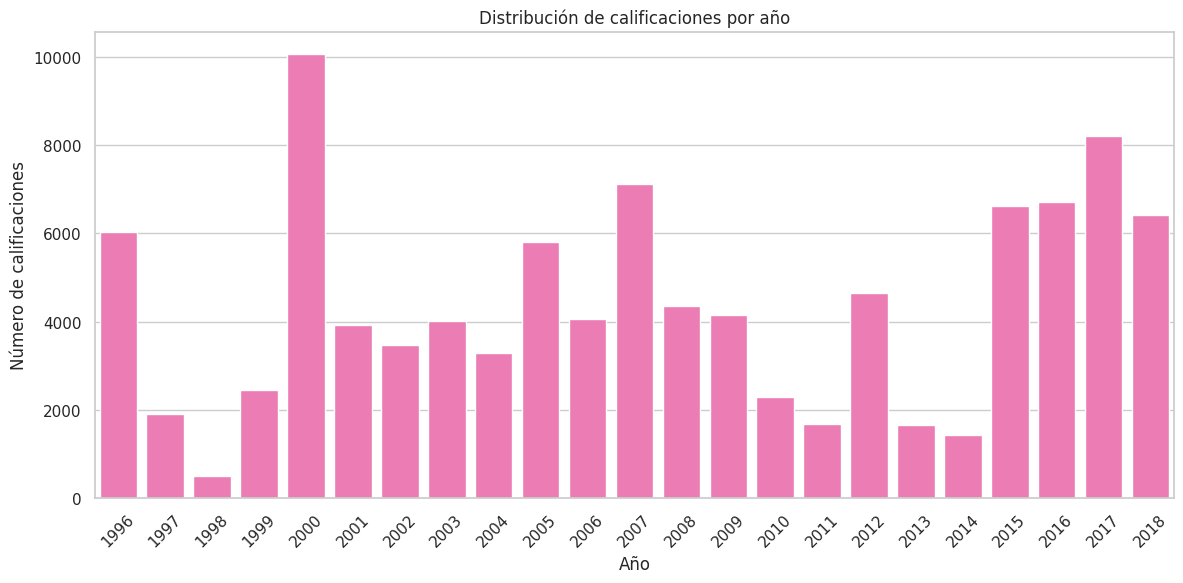

In [19]:
sns.set(style="whitegrid")

# cremaos columna 'anio' desde timestamp si no existe
df['anio'] = df['timestamp'].dt.year

# contar número de calificaciones por año
ratings_por_anio = df['anio'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.barplot(x=ratings_por_anio.index, y=ratings_por_anio.values, color="hotpink")
plt.title("Distribución de calificaciones por año")
plt.xlabel("Año")
plt.ylabel("Número de calificaciones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**1.4 – Distribución de calificaciones por mes**

En esta sección analizams la distribución de las calificaciones agregadas por mes. Este análisis nos ayudar aa identificar patrones estacionales, es decir, si hay meses específicos del año en los que los usuarios tienden a calificar más películas.

Estos patrones pueden ser útiles para comprender hábitos de visualización a lo largo del año, como aumentos en vacaciones o festividades.


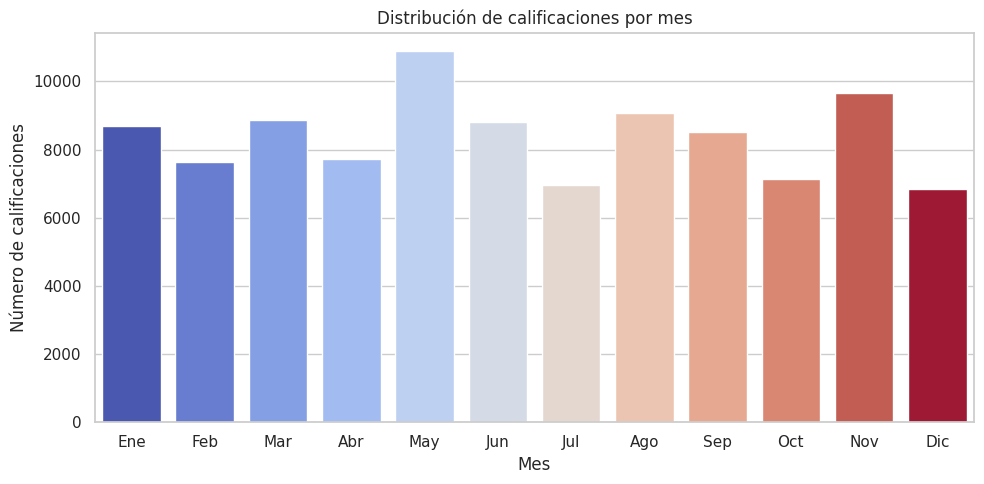

In [20]:
#crear columna 'mes' si aún no existe
df['mes'] = df['timestamp'].dt.month

#calculamos lafrecuencia de calificaciones por mes
ratings_por_mes = df['mes'].value_counts().sort_index()



plt.figure(figsize=(10, 5))
sns.barplot(x=ratings_por_mes.index, y=ratings_por_mes.values, hue=ratings_por_mes.index, palette="coolwarm", legend=False)
plt.title("Distribución de calificaciones por mes")
plt.xlabel("Mes")
plt.ylabel("Número de calificaciones")
plt.xticks(ticks=range(0, 12), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()


**1.5 – Distribución de calificaciones por género**  
Analizamos cómo se distribuyen las calificaciones según los géneros cinematográficos, asi identificamos cuáles tienden a recibir mejores o peores puntuaciones por parte de los usuarios.

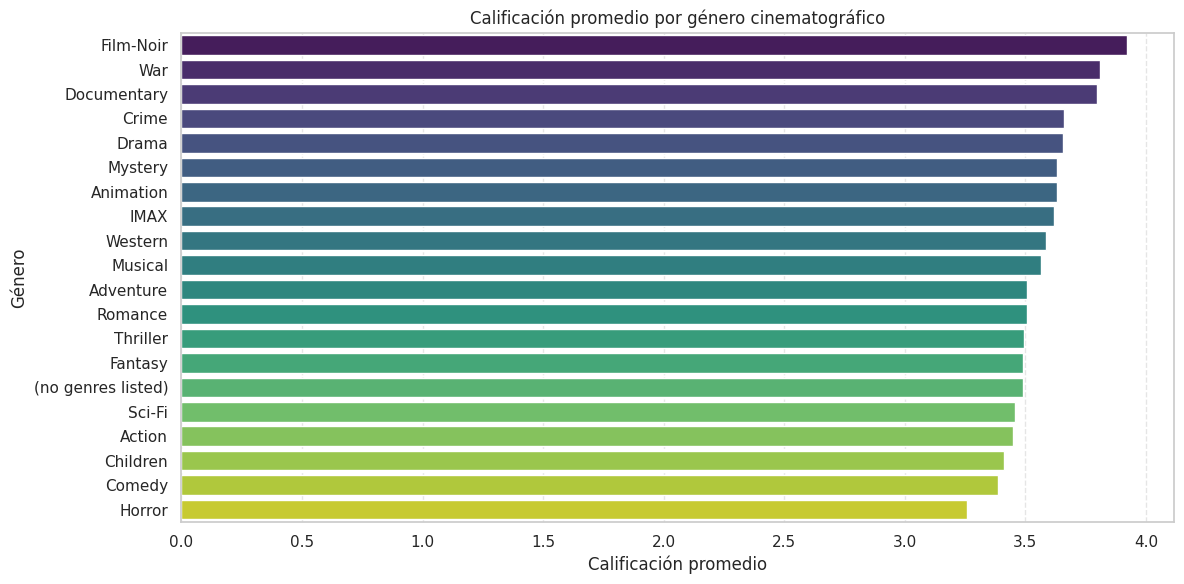

In [21]:
df_exploded = df.copy()
df_exploded['genres'] = df_exploded['genres'].str.split('|')
df_exploded = df_exploded.explode('genres')

# agrupamos por género y calcualmos la media
ratings_por_genero = df_exploded.groupby('genres')['rating'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(
    x=ratings_por_genero.values,
    y=ratings_por_genero.index,
    hue=ratings_por_genero.index,  # asignamos hue
    palette="viridis",
    dodge=False,                   # para que no se separe
    legend=False                   # quitamos leyenda redundante
)
plt.xlabel("Calificación promedio")
plt.ylabel("Género")
plt.title("Calificación promedio por género cinematográfico")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Ejercicio 1.6 – Conteo de calificaciones por género**  

Este análisis nos ayudara a conocer qué géneros cinematográficos reciben más participación por parte de los usuarios, es decir, cuáles son los más calificados en términos absolutos. A diferencia de la calificación promedio (que analizamos antes), aquí simplemente se cuentan cuántas veces se ha calificado una película perteneciente a cada género, sin importar el valor de la calificación.

Esto nos ayuda a conocer la popularidad general o exposición de ciertos géneros en la plataforma.

Calificaciones por género:
genres
Drama                 41928
Comedy                39053
Action                30635
Thriller              26452
Adventure             24161
Romance               18124
Sci-Fi                17243
Crime                 16681
Fantasy               11834
Children               9208
Mystery                7674
Horror                 7291
Animation              6988
War                    4859
IMAX                   4145
Musical                4138
Western                1930
Documentary            1219
Film-Noir               870
(no genres listed)       47
Name: count, dtype: int64


/tmp/ipykernel_5180/2480073608.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_por_genero.values, y=conteo_por_genero.index, palette="magma")


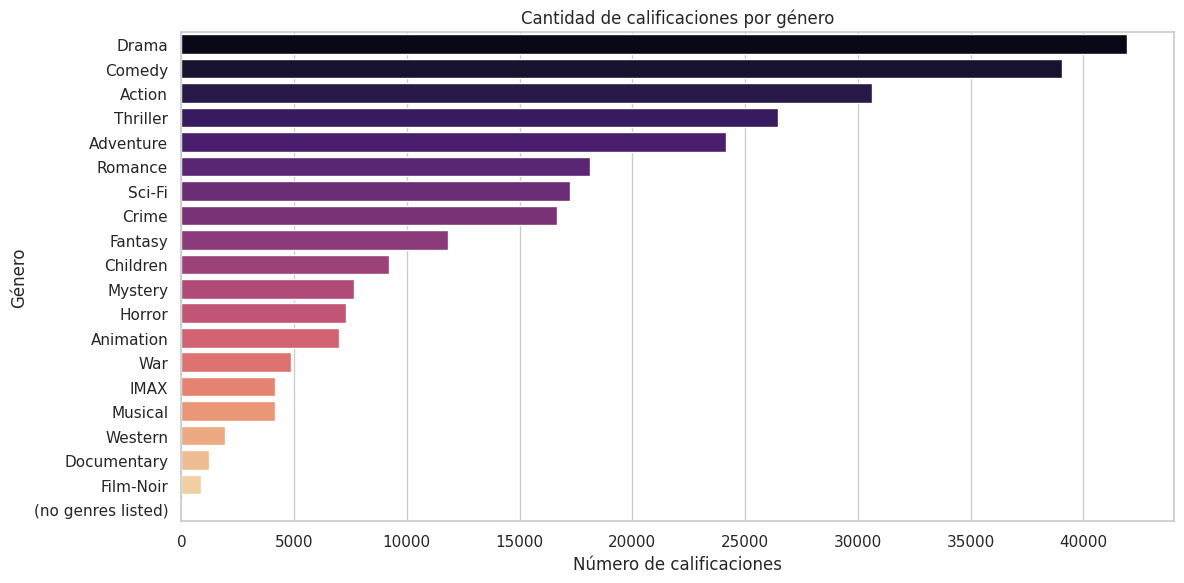

In [22]:
df_generos = df.copy()
df_generos["genres"] = df_generos["genres"].str.split("|")

# explcode para obtener una fila por cada género
df_generos = df_generos.explode("genres")

# contamos las calificaciones por género
conteo_por_genero = df_generos["genres"].value_counts().sort_values(ascending=False)
print("Calificaciones por género:")
print(conteo_por_genero)


plt.figure(figsize=(12,6))
sns.barplot(x=conteo_por_genero.values, y=conteo_por_genero.index, palette="magma")
plt.title("Cantidad de calificaciones por género")
plt.xlabel("Número de calificaciones")
plt.ylabel("Género")
plt.tight_layout()
plt.show()


**1.7 – Estadísticas descriptivas y exploración adicional**

Incluimos un resumen estadístico de las calificaciones, el conteo de películas y usuarios únicos, y visualizaciones adicionales para entender mejor la distribución de los datos.

In [23]:
print("Estadísticas descriptivas de las calificaciones:")
print(df['rating'].describe())

# numero de películas y usuarios únicos
print("\nNúmero de películas únicas:", df['title'].nunique())
print("Número de usuarios únicos:", df['userId'].nunique())

Estadísticas descriptivas de las calificaciones:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Número de películas únicas: 9719
Número de usuarios únicos: 610


**2.0 Recomendación basada en usuarios similares (User-based Collaborative Filtering)**  

Este enfoque parte del supuesto de que usuarios que han calificado películas de forma similar en el pasado, probablemente comparten gustos. Por lo tanto, podemos hacer recomendaciones personalizadas a un usuario A basándose en lo que otros usuarios similares a él han calificado altamente.

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

#creamos la matriz de usuario-película
matriz_ratings = df.pivot_table(index='userId', columns='title', values='rating')
#llenamos los valores nulos con 0 (para similitud coseno)
matriz_ratings_llena = matriz_ratings.fillna(0)

# convertimos a matriz dispersa para eficiencia
matriz_sparse = csr_matrix(matriz_ratings_llena.values)

# similitud coseno entre usuarios
similitud_usuarios = cosine_similarity(matriz_sparse)

# pasamos a dataframe para análisis
similitud_df = pd.DataFrame(similitud_usuarios, index=matriz_ratings_llena.index, columns=matriz_ratings_llena.index)

usuario_base = 10
similares = similitud_df[usuario_base].sort_values(ascending=False)[1:6]  # Se excluye a sí mismo

print(f"Usuarios más similares al usuario {usuario_base}:\n")
print(similares)

Usuarios más similares al usuario 10:

userId
159    0.288265
143    0.273902
563    0.264359
177    0.246305
189    0.231227
Name: 10, dtype: float64


# 2
**2.1 Predicción de películas para un usuario específico**  

Generaremos recomendaciones personalizadas para un usuario con base en los gustos de usuarios similares. En este caso, usaremos al usuario 10 como ejemplo.

Vamos a:

Identificar las películas que el usuario 10 aún no ha calificado.

Estimar la puntuación esperada de esas películas promediando las calificaciones que les han dado los usuarios similares, ponderadas por su similitud.

Ordenar esas predicciones y mostrar las películas recomendadas.

In [25]:
#obtenemos las películas que ya vioel usuario 10
peliculas_vistas = matriz_ratings.loc[usuario_base][matriz_ratings.loc[usuario_base].notna()].index

# filtramos las películas que aun no ve
peliculas_no_vistas = matriz_ratings.columns.difference(peliculas_vistas)

# iniciamos diccionario para almacenar predicciones
predicciones = {}

# para cada película que aun no ve, estimamos una calificación ponderada
for pelicula in peliculas_no_vistas:
    calificaciones_similares = []
    pesos = []
    
    for usuario_similar in similares.index:
        rating = matriz_ratings.loc[usuario_similar, pelicula]
        if pd.notna(rating):
            peso = similares[usuario_similar]
            calificaciones_similares.append(rating * peso)
            pesos.append(peso)
    
    if pesos:
        predicciones[pelicula] = sum(calificaciones_similares) / sum(pesos)

recomendaciones_ordenadas = pd.Series(predicciones).sort_values(ascending=False)



print("Películas recomendadas para el usuario 10:\n")
print(recomendaciones_ordenadas.head(5))


Películas recomendadas para el usuario 10:

12 Angry Men (1997)                                       5.0
Emperor's New Groove, The (2000)                          5.0
101 Dalmatians (One Hundred and One Dalmatians) (1961)    5.0
Hidden Figures (2016)                                     5.0
Hello, Dolly! (1969)                                      5.0
dtype: float64


Estas predicciones nos perimitieron anticipar con un alto nivel de confianza que estas películas serían bien recibidas por el usuario 10, ofreciendo una recomendación personalizada y basada en datos reales.


**2.2 Evaluación general de cobertura y diversidad del sistema**

Para evaluar la eficacia del sistema de recomendación, no solo es importante observar si las predicciones son acertadas, sino también **cuán amplio y diverso es el rango de recomendaciones que pudimos  generar**.

Aplicaremos 2 métricas clave n este contexto:

- **Cobertura**: Proporción de películas dentro del catálogo total que el sistema es capaz de recomendar. Un sistema con baja cobertura solo sugiere películas muy populares o comunes, mientras que uno con alta cobertura explora también opciones menos conocidas.
  
- **Diversidad**: Grado en que las recomendaciones son variadas entre diferentes géneros, épocas, estilos, etc. Un sistema con alta diversidad evita ofrecer listas homogéneas y favorece una experiencia más rica y exploratoria para el usuario.

In [26]:
def obtener_recomendaciones(usuario_id, usuarios_similares, top_n=5):
    #peliculas que ya vio el usuario
    peliculas_vistas = matriz_ratings.loc[usuario_id][matriz_ratings.loc[usuario_id].notna()].index
    peliculas_no_vistas = matriz_ratings.columns.difference(peliculas_vistas)
    predicciones = {}

    for pelicula in peliculas_no_vistas:
        calificaciones_similares = []
        pesos = []
        for usuario_similar in usuarios_similares:
            rating = matriz_ratings.loc[usuario_similar, pelicula]
            if pd.notna(rating):
                peso = similitud_df.loc[usuario_id, usuario_similar]
                calificaciones_similares.append(rating * peso)
                pesos.append(peso)
        if pesos:
            predicciones[pelicula] = sum(calificaciones_similares) / sum(pesos)
    recomendaciones_ordenadas = pd.Series(predicciones).sort_values(ascending=False)
    return recomendaciones_ordenadas.head(top_n)

In [27]:
# lista de películas recomendadas para todos los usuarios
usuarios = df['userId'].unique()
peliculas_recomendadas = set()

for u in usuarios[:100]:  # evaluamos los primeros 100 usuarios por rapidez
    similares = similitud_df.loc[u].sort_values(ascending=False)[1:6]
    recomendadas = obtener_recomendaciones(u, similares.index)
    peliculas_recomendadas.update(recomendadas.index)

# calculo de cobertura
catalogo_total = set(df['title'].unique())
cobertura = len(peliculas_recomendadas) / len(catalogo_total)
print(f"Cobertura del sistema (en los primeros 100 usuarios): {cobertura:.2%}")

# calculo de diversidad usando número de géneros distintos
generos_recomendados = df[df['title'].isin(peliculas_recomendadas)]['genres'].str.split('|')
generos_distintos = set([g for sublist in generos_recomendados.dropna() for g in sublist])
print(f"Número de géneros distintos en recomendaciones: {len(generos_distintos)}")


Cobertura del sistema (en los primeros 100 usuarios): 3.68%
Número de géneros distintos en recomendaciones: 19


**2.3 Evaluación cualitativa de recomendaciones por usuario**  

AQui revisaremos manualmente las recomendaciones generadas para usuarios específicos. El objetivo es evaluar si las películas sugeridas:

Están alineadas con los gustos previos del usuario.

Mantienen una buena variedad de géneros.

Tienen valor percibido (según rating o popularidad).

In [28]:
usuario_objetivo = 10

# Ver películas que ya ha calificado
peliculas_usuario = df[df['userId'] == usuario_objetivo][['title', 'rating']]
print(f"Películas ya vistas por el usuario {usuario_objetivo}:")
display(peliculas_usuario.sort_values(by='rating', ascending=False).head(10))

# Usuarios más similares (ya obtenido anteriormente)
similares = similitud_df.loc[usuario_objetivo].sort_values(ascending=False)[1:6]
print(f"\nUsuarios más similares al usuario {usuario_objetivo}:\n")
print(similares)

# Recomendaciones generadas
recomendaciones = obtener_recomendaciones(usuario_objetivo, similares.index)
print(f"\nPelículas recomendadas para el usuario {usuario_objetivo}:\n")
print(recomendaciones)


Películas ya vistas por el usuario 10:


,title,rating
1256,Spectre (2015),5.0
1236,Skyfall (2012),5.0
1229,"Dark Knight Rises, The (2012)",5.0
1230,Intouchables (2011),5.0
1205,"Education, An (2009)",5.0
1216,Despicable Me (2010),5.0
1163,"Notebook, The (2004)",5.0
1182,"Holiday, The (2006)",5.0
1181,Casino Royale (2006),5.0
1167,First Daughter (2004),5.0



Usuarios más similares al usuario 10:

userId
159    0.288265
143    0.273902
563    0.264359
177    0.246305
189    0.231227
Name: 10, dtype: float64

Películas recomendadas para el usuario 10:

12 Angry Men (1997)                                       5.0
Emperor's New Groove, The (2000)                          5.0
101 Dalmatians (One Hundred and One Dalmatians) (1961)    5.0
Hidden Figures (2016)                                     5.0
Hello, Dolly! (1969)                                      5.0
dtype: float64


**2.4 Limitaciones del sistema de recomendación**

A pesar de los resultados prometedores, el sistema de recomendación basado en filtrado colaborativo por similitud de usuarios presenta diversas limitaciones estructurales y funcionales que es necesario considerar:

**1.- Escasez de datos (cold start problem)**

El sistema requiere un volumen considerable de calificaciones por parte de cada usuario para generar recomendaciones efectivas. Cuando un nuevo usuario entra al sistema (sin historial) o una nueva película es añadida (sin evaluaciones), el algoritmo no puede ofrecer resultados significativos. Este fenómeno se conoce como el **problema de arranque en frío**, y es una limitación intrínseca de los métodos colaborativos puros.

**2.- Escalabilidad**

La matriz de similitud entre usuarios crece cuadráticamente con la cantidad de usuarios, lo que puede afectar la eficiencia computacional en entornos con millones de registros. 

**3.- Homogeneidad excesiva**

La naturaleza del filtrado colaborativo tiende a recomendar películas populares dentro de un grupo de usuarios similares, lo cual puede reducir la diversidad a largo plazo. Aunque el sistema muestra cierto grado de diversidad en los géneros sugeridos (19 géneros distintos), persiste el riesgo de **efecto burbuja**: se refuerzan los mismos gustos, sin promover suficiente descubrimiento.

**4.- Falta de análisis de contenido**

El modelo no considera el contenido semántico de las películas (título, sinopsis, elenco, duración, etc.), lo que impide ofrecer recomendaciones más personalizadas o explicar por qué una película fue sugerida. Esto limita la capacidad de razonamiento del sistema frente a usuarios curiosos o que deseen entender las sugerencias recibidas.

**5.- Dependencia del comportamiento colectivo**

La calidad de las recomendaciones depende directamente de la calidad y cantidad de datos de los demás usuarios. Si existen sesgos sistemáticos, ratings inconsistentes o grupos dominantes en la base de datos, el modelo tenderá a reproducir esas distorsiones.


# 3. Análisis exploratorio y visualización inicial

En esta sección se realiza un análisis estadístico descriptivo y se presentan gráficos que muestran patrones y relaciones importantes en los datos. Esto incluye:
- Estadísticas descriptivas de las calificaciones.
- Distribución de ratings.
- Conteo de películas y usuarios únicos.
- Top de películas más calificadas.
- Distribución de calificaciones por año, mes y género.
- Análisis de popularidad y preferencias por género.

Estadísticas descriptivas de las calificaciones:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Número de películas únicas: 9719
Número de usuarios únicos: 610


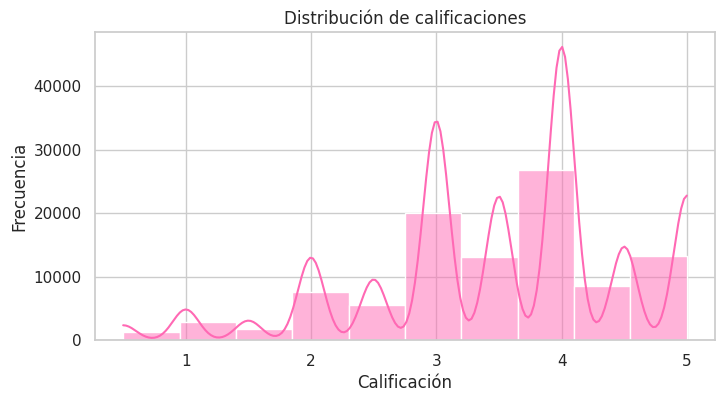

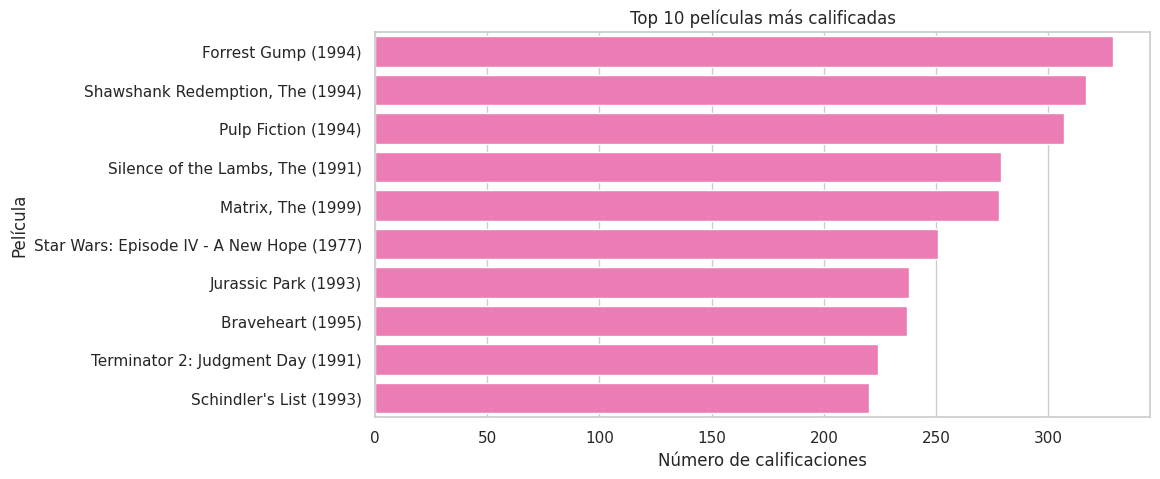

In [29]:
# Estadísticas descriptivas de las calificaciones
print("Estadísticas descriptivas de las calificaciones:")
print(df['rating'].describe())

# Número de películas y usuarios únicos
print("\nNúmero de películas únicas:", df['title'].nunique())
print("Número de usuarios únicos:", df['userId'].nunique())

# Histograma de la distribución de ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['rating'], bins=10, kde=True, color="hotpink")
plt.title("Distribución de calificaciones")
plt.xlabel("Calificación")
plt.ylabel("Frecuencia")
plt.show()

# Top 10 películas más calificadas
top_peliculas = df['title'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_peliculas.values, y=top_peliculas.index, color="hotpink")
plt.title("Top 10 películas más calificadas")
plt.xlabel("Número de calificaciones")
plt.ylabel("Película")
plt.show()

**Resumen de hallazgos del análisis exploratorio:**
- La mayoría de las calificaciones se concentran en valores altos.
- Algunos géneros y películas son mucho más populares que otros.
- Hay variación en la cantidad de calificaciones por año y mes.
- El dataset es suficientemente diverso para probar sistemas de recomendación.